In [ ]:
#Libary imports
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import sklearn as SK
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Test imported correctly & version
print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(sns.__version__)
print(SK.__version__)

1.21.6
1.3.5
2.8.0
0.11.2
1.0.2


In [ ]:
#Reading the file 
df = pd.read_csv("creditcard.csv")

#Sample file to check if it has been read
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
238942,149887.0,-1.312272,1.498490,1.032589,4.576608,0.005543,1.596070,-0.553598,0.986340,-1.482738,...,0.239734,0.758225,-0.377278,0.740483,-0.224530,0.486888,-0.553299,-0.289620,18.52,0
171167,120525.0,1.802980,-0.573555,-1.695181,0.635055,0.399602,1.164311,-0.800088,0.455734,-0.501848,...,-0.310165,-0.337828,0.168485,-1.901670,-0.370531,-0.564167,0.122966,0.001523,77.00,0
11389,19876.0,1.143786,-0.299606,1.052279,-0.688602,-0.813699,0.045527,-0.766045,0.114260,2.695177,...,-0.065987,0.328028,-0.028354,0.007954,0.403295,-0.717171,0.083860,0.019235,11.85,0
216572,140535.0,-3.239417,1.905417,-0.222833,-1.094422,-0.749993,-0.151242,-0.182630,0.681000,2.367966,...,-0.087941,0.612541,-0.020772,0.578868,0.183457,0.615689,0.955077,1.090844,29.99,0
282767,171132.0,-0.748972,-0.537249,1.862441,-1.367889,-1.128198,0.813276,-0.281005,0.289413,-0.396039,...,0.001371,0.550992,-0.023814,0.741235,-0.592317,-0.362683,0.206619,0.126613,156.20,0


In [ ]:
#Isolate 'Normal' & 'Fraudulent' transaction
Normal = df[df["Class"] == 0]
Fraudulent = df[df["Class"] == 1]

print("Normal Transaction :")
print(Normal)
print("Fraudulent Transaction :")
print(Fraudulent)

Normal Transaction :
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0

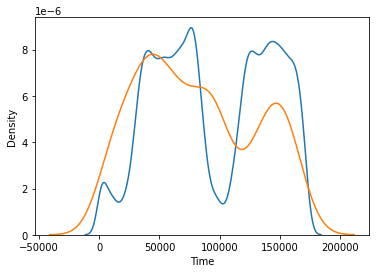

In [ ]:
#Time / density distribution analysis
sns.kdeplot(Normal["Time"])
sns.kdeplot(Fraudulent["Time"])

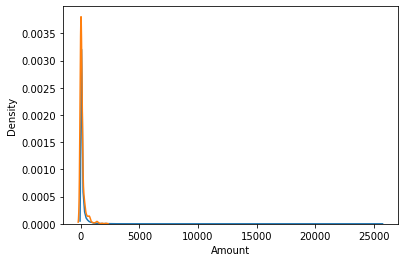

In [ ]:
#Amount / density distribution analysis
sns.kdeplot(Normal["Amount"])
sns.kdeplot(Fraudulent["Amount"])

In [ ]:
#Isolating varibles
#Model will analysis V1 - V28
x = df.iloc[:,1:29]
print("X values")
print(x)

#Comparison varible ("class")
y = df.iloc[:,-1]
print("Y values")
print(y)

X values
               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V19       V20  \
0       0.239599  0.098698  0.363787  0.090794  ...

In [ ]:
#Divinding training set & testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#Initializing ANN
#Sequential : allows creation of model layer by layer
ANN = tf.keras.models.Sequential()

#Inputing layer
#Unit : number of neurons
ANN.add(tf.keras.layers.Dense(units=5, activation="relu"))

ANN.add(tf.keras.layers.Dense(units=3, activation="sigmoid"))

ANN.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
#Compiling
#Optimizer : Used to change attribute (e.g. weights, learning rates) of model to reduce losses
#Adam : stochastic gradient decent based on estimate
ANN.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#Training the ANN
#Batch_size : Number of samples past through network at one time
#Epochs : Number of training iterations
#Validation_split : How data is split between training and validation sets
Outcome = ANN.fit (x_train, y_train, batch_size = 30, epochs = 10, validation_split=0.3)

Epoch 1/10
5317/5317 [==============================] - 13s 2ms/step - loss: 0.0602 - accuracy: 0.9981 - val_loss: 0.0065 - val_accuracy: 0.9984
Epoch 2/10
5317/5317 [==============================] - 12s 2ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0045 - val_accuracy: 0.9984
Epoch 3/10
5317/5317 [==============================] - 12s 2ms/step - loss: 0.0039 - accuracy: 0.9983 - val_loss: 0.0041 - val_accuracy: 0.9984
Epoch 4/10
5317/5317 [==============================] - 12s 2ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 5/10
5317/5317 [==============================] - 12s 2ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/10
5317/5317 [==============================] - 12s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 7/10
5317/5317 [==============================] - 12s 2ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0033 - val_ac

Text(0, 0.5, 'Accuracy')

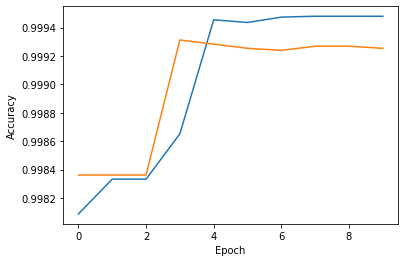

In [ ]:
#Accuracy curve
plt.plot(Outcome.history["accuracy"])
plt.plot(Outcome.history["val_accuracy"])

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

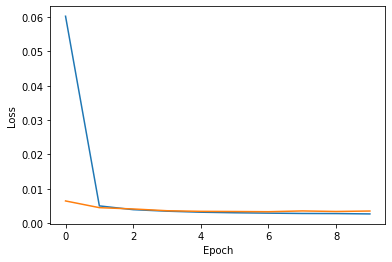

In [ ]:
#Loss curver
plt.plot(Outcome.history["loss"])
plt.plot(Outcome.history["val_loss"])

plt.xlabel("Epoch")
plt.ylabel("Loss")

In [ ]:
#Decision tree 
Classifer = DecisionTreeClassifier()  
Classifer.fit(x_train,y_train)

y_predict = Classifer.predict(x_test)

print("Accuracy :")
accuracy_score(y_test,y_predict)

Accuracy :


0.9992802219023208